# Lab 3: Rigid Registration
Author(s): Md Imran Hossain, Muhammad Zain Amin

## Remainder

Among other useful information, it tells you to make a copy of this Colab notebook BEFORE you try to run it:

- Make a copy on your own Colab space by clicking on the `copy to drive` button.
- Alternatively you could go to the menu `File > Save a copy in Drive`
- Then, open your new file on a new tap and rename it, and you’re ready to start tinkering with the code
- Look carefully at the existing code before you execute it. Try to understand what the code is doing. Part of your learning outcome is to understand it, and we will quiz you about it.
- In several places of the code, you’ll find `#__________TO DO_________`.
There you should introduce your code.

Once you are done, submit this notebook by the lab deadline, with the cells executed and including your **answers** in the text fields in $\color{red}{\text{red}}$ color.

Use `$\color{red}{\text{This is my red text}}$` to write "$\color{red}{\text{This is my red text}}$".

# Loading the required files
You can load into the temporal workspace of Colab the following required files:

*   the data files `LAB3_data`. Download them from Moodle to your computer and uncompress them.

You should copy these files from your computer using the function `files.upload()`. Use the `Choose Files` button to upload both files from your local drive.

Don't use Safari, it is preferable to use google chrome

## Goals of this lab
The aim of this lab is to develop competences regarding teamwork and problem solving. By developing the proposed activity you will also become familiar with SIFT and planar transformations for rigid image registration: how to extract invariant features, how to describe them, how to match them and how to use them to compute a homography. Most importantly, this should give you some feeling about the strengths and weaknesses of local feature-based approaches.
It should be noted that before you start this activity, you should read Lowe’s paper on SIFT:

David G. Lowe, "Distinctive image features from scale-invariant keypoints," International Journal of Computer Vision, 60, 2 (2004), pp. 91-110.
The paper can be downloaded from [here](http://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf).

This lab requires working in teams of two (exceptionally three) students. The labs will be organized on the first lab session by the professor who acts as lab instructor.

Students will have to:

1. Test Lowe’s implementation on a set of images showing some skin lesions.
2. Register the images pairs corresponding to the same skin lesion using Lowe’s implementation to detect and match features, and implementing different motion models by estimating homography matrices.
3. Improve the registration accuracy by means of data normalization for the homography estimation.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving skin1.png to skin1.png
Saving skin2.png to skin2.png


## Additional tools
In this lab, we will also make use of:
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data
- Routines in the aux_utils.py file, which should already be in the local directory
- Opencv
-...

In [35]:
import math, copy
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#from aux_utils import plt_house_x, plt_contour_wgrad, plt_gradients, plt_cost_vs_theta1
from google.colab import files
# import time
from IPython import display
from time import sleep
# import opencv
import cv2
from google.colab.patches import cv2_imshow

import pandas as pd
import io
from PIL import Image
#Import math Library
import math
import scipy.linalg as linalg

from scipy.optimize import least_squares

from skimage.measure import ransac
from skimage.transform import ProjectiveTransform

<ipython-input-35-ff759c4f79ad>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Detect SIFT Keypoints and Descriptors
Now we will register real images.

Register skin1.png with skin2.png

First, load and show the images.

Also set SIFT to detect keypoints on images

$\color{yellow}{\text{To be done during 1st lab session}}$

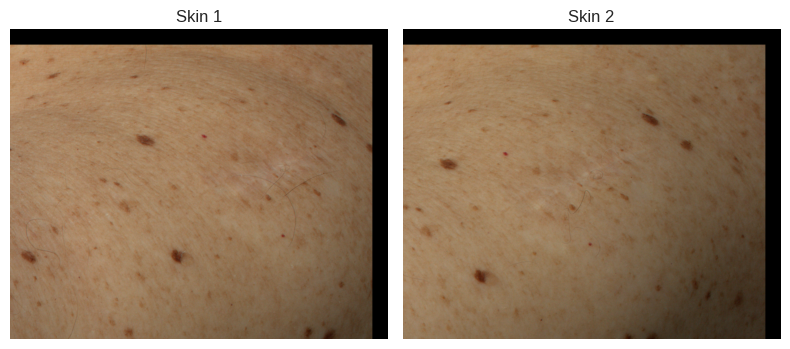

In [3]:
# Reading skin images
skin_1 = cv2.imread("skin1.png")
skin_2 = cv2.imread("skin2.png")

# Display both images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(skin_1, cv2.COLOR_BGR2RGB))
plt.title('Skin 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(skin_2, cv2.COLOR_BGR2RGB))
plt.title('Skin 2')
plt.axis('off')

plt.tight_layout()
plt.show()

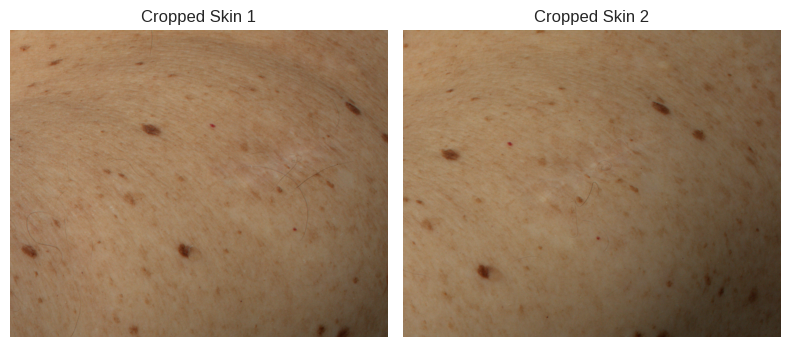

In [4]:
# Function to crop black borders from the image
def crop_black_border(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    x, y, w, h = cv2.boundingRect(contours[0])
    cropped_image = image[y:y+h, x:x+w]
    return cropped_image

# Crop black borders from the images
cropped_skin_1 = crop_black_border(skin_1)
cropped_skin_2 = crop_black_border(skin_2)

# Display cropped images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cropped_skin_1, cv2.COLOR_BGR2RGB))
plt.title('Cropped Skin 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cropped_skin_2, cv2.COLOR_BGR2RGB))
plt.title('Cropped Skin 2')
plt.axis('off')

plt.tight_layout()
plt.show()

## Plot the Keypoints
$\color{yellow}{\text{To be done during 1st lab session}}$

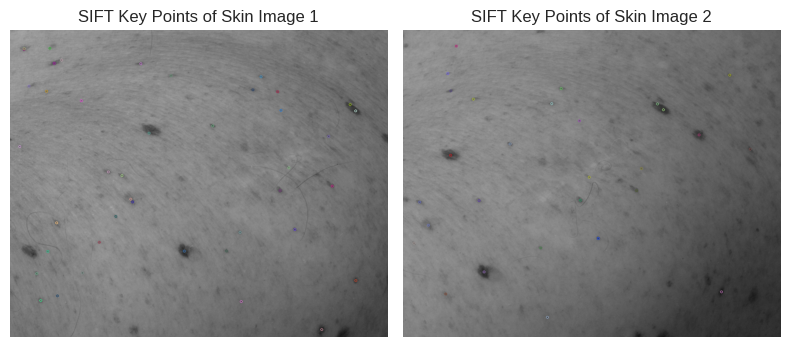

In [5]:
# Keypoints of Skin_1 image and Skin_2 image
gray_1 = cv2.cvtColor(cropped_skin_1, cv2.COLOR_BGR2GRAY)
gray_2 = cv2.cvtColor(cropped_skin_2, cv2.COLOR_BGR2GRAY)

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(gray_1,None)
kp2, des2 = sift.detectAndCompute(gray_2,None)

# keypoints of skin_1 image
keypoints_skin_1_img = cv2.drawKeypoints(gray_1, kp1, cropped_skin_1)

# keypoints of skin_2 image
keypoints_skin_2_img = cv2.drawKeypoints(gray_2, kp2, cropped_skin_2)

# Plot the SIFT keypoints
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(keypoints_skin_1_img)
plt.title('SIFT Key Points of Skin Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(keypoints_skin_2_img)
plt.title('SIFT Key Points of Skin Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()


## Compute Brute Force Matching

$\color{yellow}{\text{To be done during 1st lab session}}$

In [6]:
# Brute Force Matching with default parameters
bf = cv2.BFMatcher()
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

Plot matches

$\color{yellow}{\text{To be done during 1st lab session}}$

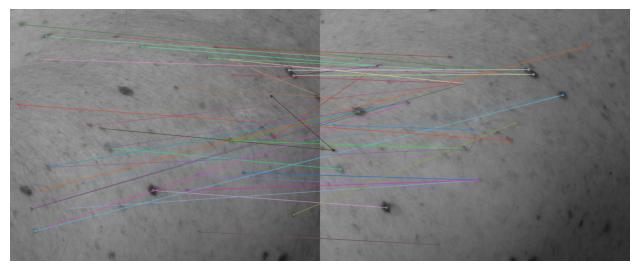

In [7]:
# Plot the Brute Force matching
bf_matching = cv2.drawMatches(gray_1, kp1, gray_2, kp2, matches[:50], gray_2, flags=2)

# Display the image without grid and axis labels
plt.imshow(bf_matching)
plt.axis('off')
plt.show()

## Lowe match

Now implement by yourself a function to match keypoints and descriptors between these 2 images

Implement the function `SIFT_match` following the article "Distinctive image features from scale-invariant keypoints" David G. Lowe.

$\color{yellow}{\text{To be done during 1st lab session}}$

In [9]:
# Create the function for lowe match
def SIFT_match(des1, des2, kp1, kp2, gray_1, gray_2):
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # Apply ratio test
    ratio = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            ratio.append([m])
    return ratio



Recompute the matches using your function

$\color{yellow}{\text{To be done during 1st lab session}}$

In [10]:
# Call SIFT_match function with the keypoints, descriptors, and grayscale images
lowe_match = SIFT_match(des1, des2, kp1, kp2, gray_1, gray_2)

Plot the new matches

$\color{yellow}{\text{To be done during 1st lab session}}$

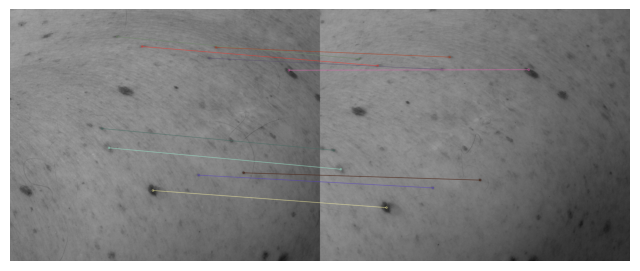

In [11]:
# Plot the lowe matching
lw_matching = cv2.drawMatchesKnn(gray_1, kp1, gray_2, kp2, lowe_match, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(lw_matching)
plt.axis('off')
plt.show()

## Compute Homographies

Compute the homography between both images using opencv function `cv2.findHomography`

Plot one of the images warped acording to the obtained Homograhy

$\color{yellow}{\text{To be done during 1st lab session}}$

In [14]:
# Function for compute homographies
def compute_homographies(des1, des2, kp1, kp2, gray_1, gray_2):
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)
    good = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good.append([m])
    lw_matching = cv2.drawMatchesKnn(gray_1, kp1, gray_2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Extracting good keypoints
    src_pts = np.float32([kp1[m[0].queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m[0].trainIdx].pt for m in good]).reshape(-1, 1, 2)

    # Finding Homography
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Warp one image onto the other using the computed homography
    height, width = gray_2.shape[:2]
    warped_img = cv2.warpPerspective(gray_1, H, (width, height))

    plt.imshow(warped_img, cmap='gray')
    plt.axis('off')
    plt.show()
    return H

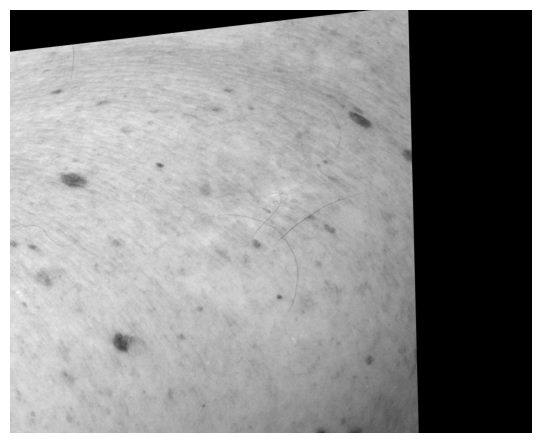

In [13]:
# Call compute_homographies function with the keypoints, descriptors, and grayscale images
computed_homography = compute_homographies(des1, des2, kp1, kp2, gray_1, gray_2)

## Homography estimation

$\color{yellow}{\text{To be done during 2nd lab session}}$

Next, we will load images `00.png`, `01.png`, `02.png` and `03.png`

In [15]:
from google.colab import files
uploaded = files.upload()

Saving 00.png to 00.png
Saving 01.png to 01.png
Saving 02.png to 02.png
Saving 03.png to 03.png
Saving Keypoints_00.csv to Keypoints_00.csv
Saving Keypoints_01.csv to Keypoints_01.csv
Saving Keypoints_02.csv to Keypoints_02.csv
Saving Keypoints_03.csv to Keypoints_03.csv


In [16]:
# Read all the images
img00c = cv2.imread("00.png")
img01c = cv2.imread("01.png")
img02c = cv2.imread("02.png")
img03c = cv2.imread("03.png")

And the csv files with keypoints

In [17]:
# Read all keypoints
keypoints_00 = genfromtxt('Keypoints_00.csv', delimiter=',', skip_header = 0)
keypoints_01 = genfromtxt('Keypoints_01.csv', delimiter=',', skip_header = 0)
keypoints_02 = genfromtxt('Keypoints_02.csv', delimiter=',', skip_header = 0)
keypoints_03 = genfromtxt('Keypoints_03.csv', delimiter=',', skip_header = 0)

print(np.shape(keypoints_00))
print(keypoints_00)

(64, 2)
[[1266.3   232.7 ]
 [1266.3   320.63]
 [1266.3   407.7 ]
 [1266.3   495.64]
 [1266.3   582.7 ]
 [1266.3   670.63]
 [1266.3   757.7 ]
 [1266.3   845.63]
 [1178.4   232.7 ]
 [1178.5   320.5 ]
 [1178.5   408.  ]
 [1178.5   495.5 ]
 [1178.5   583.  ]
 [1178.5   670.5 ]
 [1178.5   758.  ]
 [1178.3   845.65]
 [1091.3   232.7 ]
 [1091.    320.5 ]
 [1091.    408.  ]
 [1091.    495.5 ]
 [1091.    583.  ]
 [1091.    670.5 ]
 [1091.    758.  ]
 [1091.3   845.63]
 [1003.4   232.7 ]
 [1003.5   320.5 ]
 [1003.5   408.  ]
 [1003.5   495.5 ]
 [1003.5   583.  ]
 [1003.5   670.5 ]
 [1003.5   758.  ]
 [1003.3   845.65]
 [ 916.3   232.7 ]
 [ 916.    320.5 ]
 [ 916.    408.  ]
 [ 916.    495.5 ]
 [ 916.    583.  ]
 [ 916.    670.5 ]
 [ 916.    758.  ]
 [ 916.3   845.64]
 [ 828.37  232.7 ]
 [ 828.5   320.5 ]
 [ 828.5   407.99]
 [ 828.5   495.5 ]
 [ 828.5   583.  ]
 [ 828.5   670.5 ]
 [ 828.5   758.  ]
 [ 828.35  845.65]
 [ 741.3   232.7 ]
 [ 741.    320.5 ]
 [ 741.    408.  ]
 [ 741.    495.5 ]
 [ 7

Now plot img00c, img01c, img02c, img03c all images using `cv2_imshow` from `opencv`

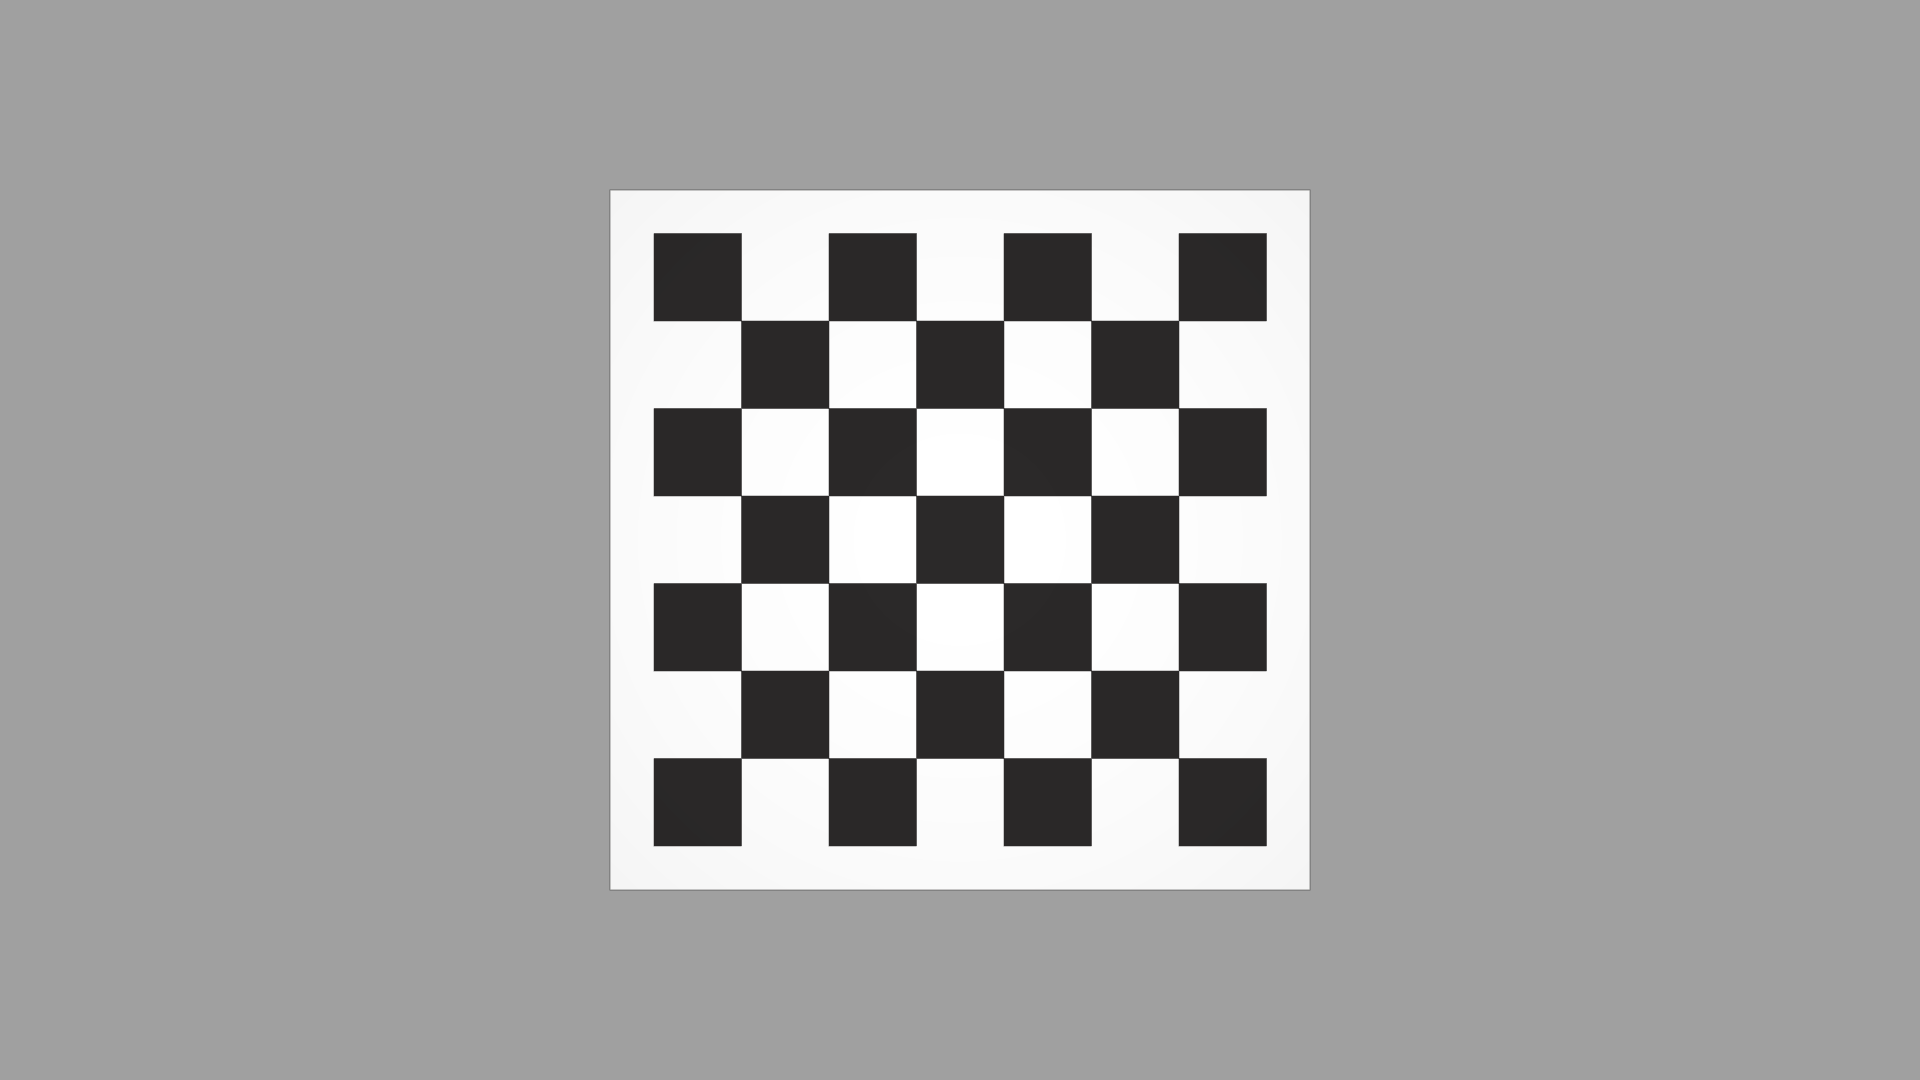

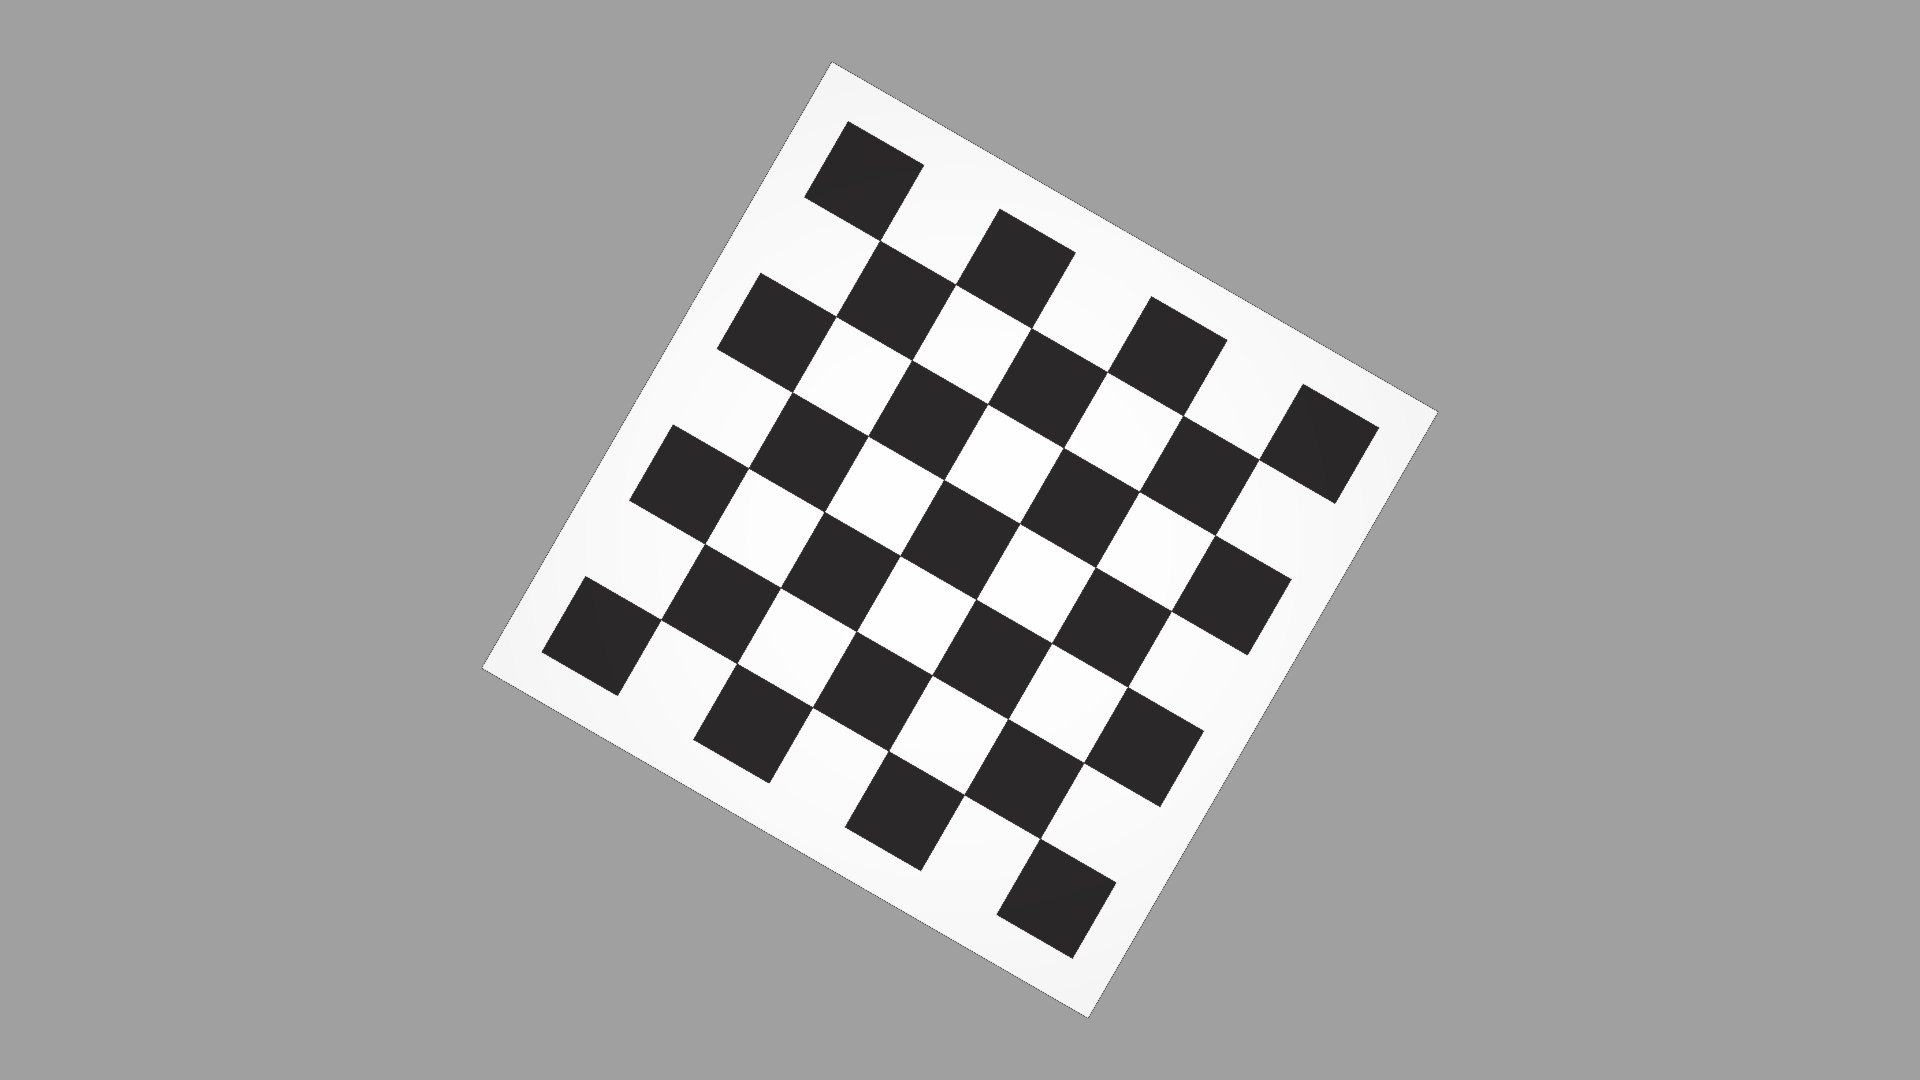

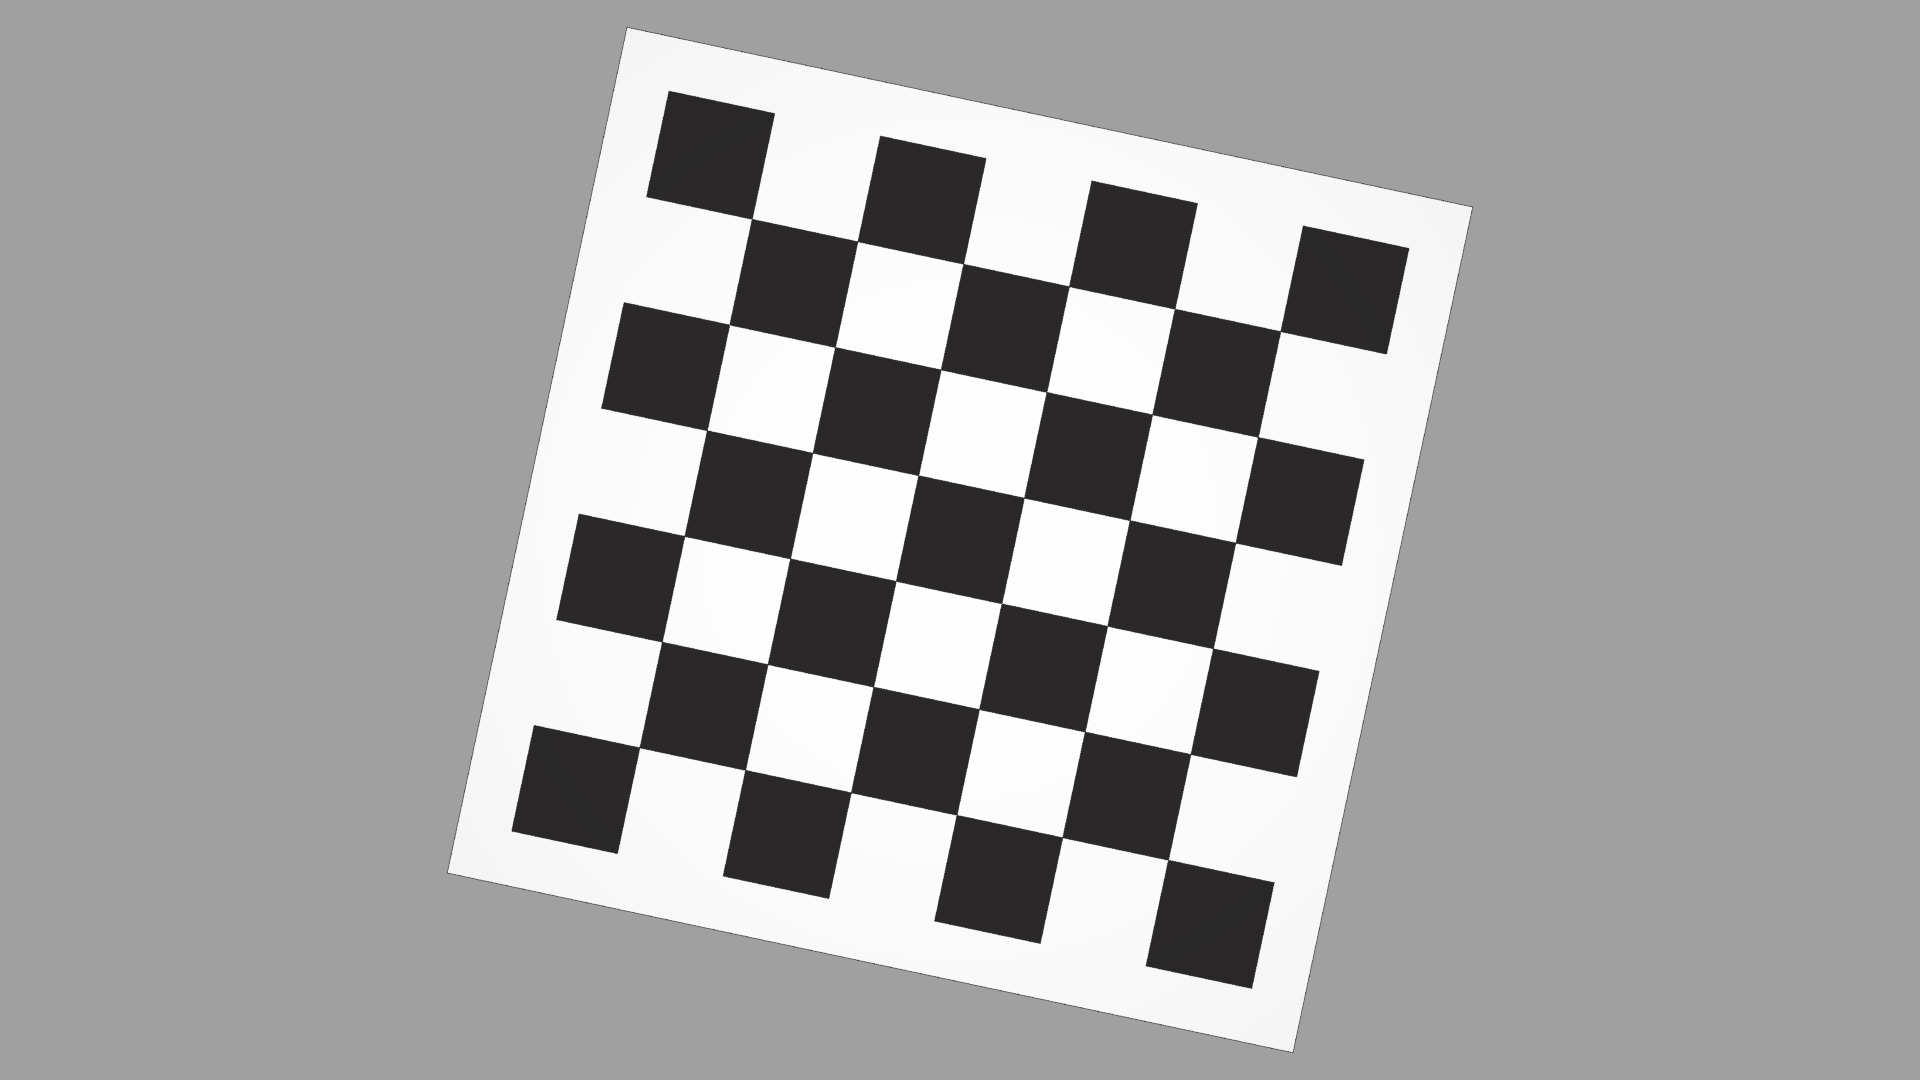

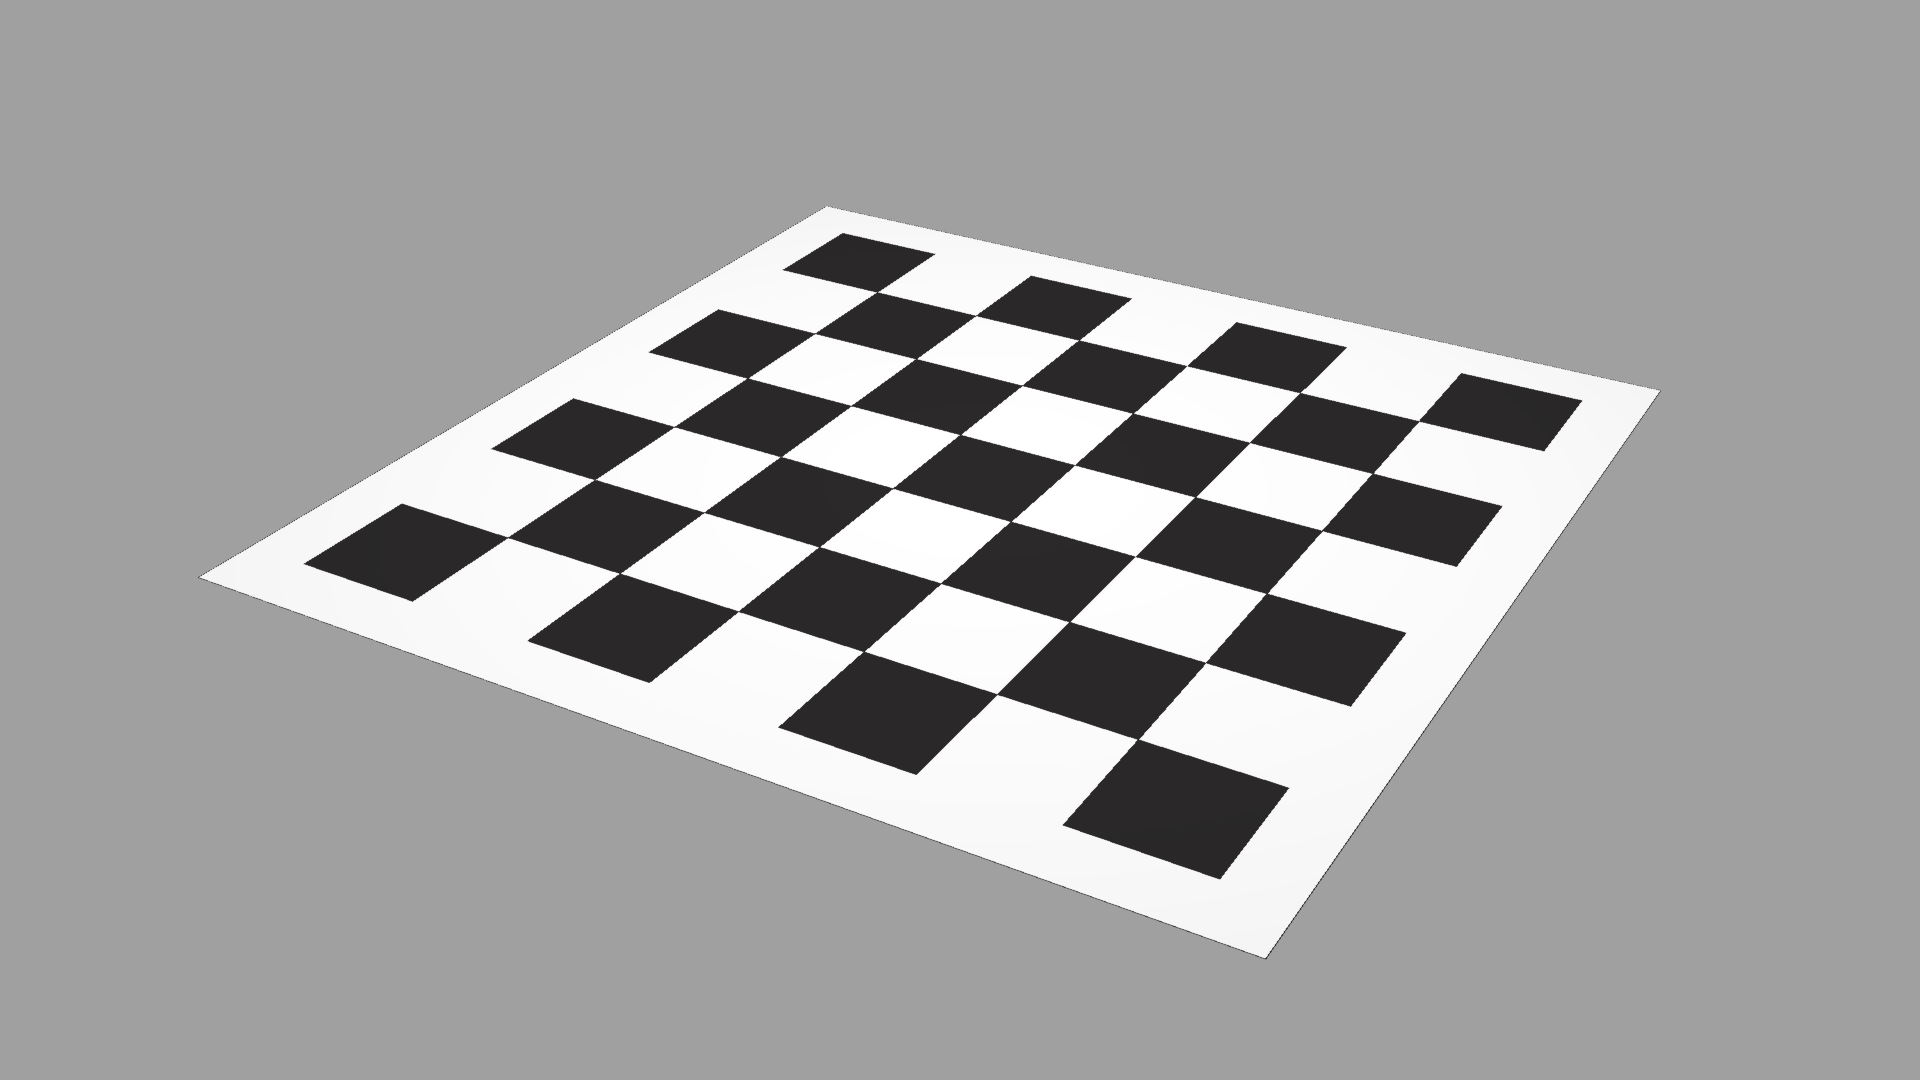

In [18]:
# Show all the images
cv2_imshow(img00c)
cv2_imshow(img01c)
cv2_imshow(img02c)
cv2_imshow(img03c)

Plot Keypoints on images.

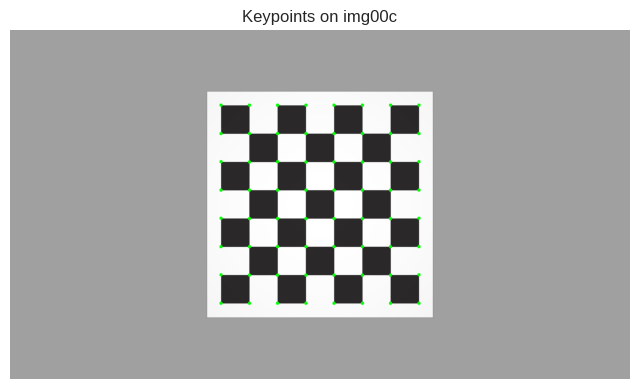

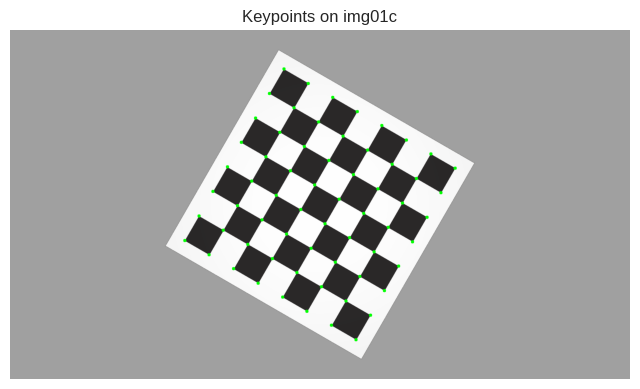

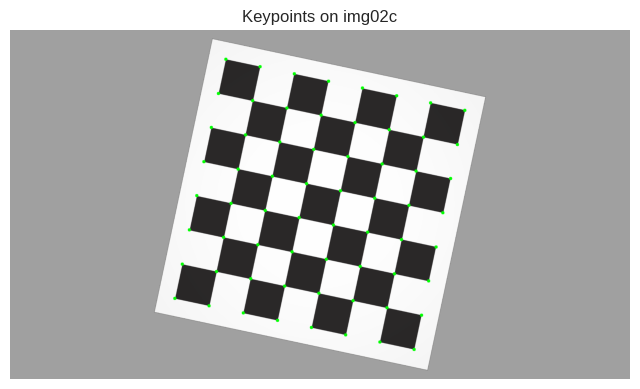

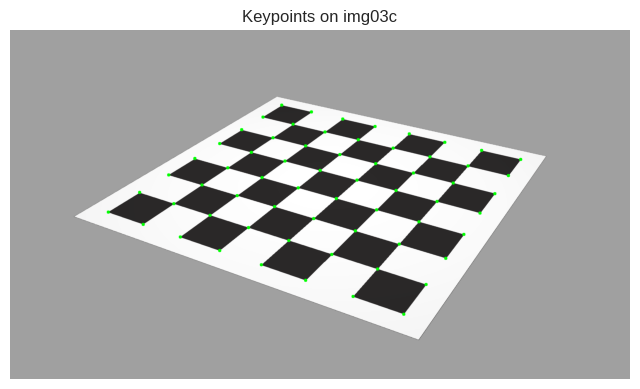

In [19]:
keypoints_00 = keypoints_00.astype(int)
keypoints_01 = keypoints_01.astype(int)
keypoints_02 = keypoints_02.astype(int)
keypoints_03 = keypoints_03.astype(int)

# Function to draw keypoints on images
def draw_keypoints(img, keypoints, title):
    img_with_keypoints = img.copy()

    for kp in keypoints:
        x, y = kp
        cv2.circle(img_with_keypoints, (x, y), 5, (0, 255, 0), -1)

    plt.figure()
    plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
    plt.title(title); plt.axis("off"); plt.show()

# Plot keypoints on images
draw_keypoints(img00c, keypoints_00, "Keypoints on img00c")
draw_keypoints(img01c, keypoints_01, "Keypoints on img01c")
draw_keypoints(img02c, keypoints_02, "Keypoints on img02c")
draw_keypoints(img03c, keypoints_03, "Keypoints on img03c")

## Compute Homography

Implement the function:

H = computeHomography(features, matches, model)

where model can be ('Euclidean', 'Similarity', 'Affine', 'Porjective')

follow your notes from MIRA lessons, don't use any opencv existing function

In [21]:
# Function for computing Homography matrix
def computeHomography(feature, matches, model):
    # Function for transformation matrix based on parameter and model
    def transformation_matrix(params, model):
        if model == "Euclidean":
            return np.array([[np.cos(params[2]), -np.sin(params[2]), params[0]],
                             [np.sin(params[2]), np.cos(params[2]), params[1]],
                             [0, 0, 1]])
        elif model == "Similarity":
            scale = 1 if len(params) == 3 else params[3]
            return np.array([[scale * np.cos(params[2]), -scale * np.sin(params[2]), params[0]],
                             [scale * np.sin(params[2]), scale * np.cos(params[2]), params[1]],
                             [0, 0, 1]])
        elif model == "Affine":
            return np.array([[params[0], params[1], params[4]],
                             [params[2], params[3], params[5]],
                             [0, 0, 1]])
        elif model == "Projective":
            return np.array([[params[0], params[1], params[2]],
                             [params[3], params[4], params[5]],
                             [params[6], params[7], 1]])

    # Function for optimize the parameter
    def optimizer(params, input, target):
        H = transformation_matrix(params, model)
        homogenous_input = np.vstack((input.T, np.ones((1, input.shape[0]))))
        transformed = H @ homogenous_input
        transformed = transformed[:2, :] / transformed[2, :]
        return (transformed - target.T).ravel()

    # Determine number of parameters based on the model
    num_params = {
        'Euclidean': 3,
        'Similarity': 4 if len(feature) == 4 else 3,
        'Affine': 6,
        'Projective': 8
    }

    # Initial parameters
    initial_params = np.zeros(num_params[model])

    # Optimize using least squares
    result = least_squares(optimizer, initial_params, args=(feature, matches))

    # Compute final homography matrix
    optimized_params = result.x
    H = transformation_matrix(optimized_params, model)

    return H

##Compute Eucliedean Homography

Compute the Euclidean Homography between all loaded images

After computing them use the function `cv2.warpPerspective` to check the obtainen result

In [ ]:
# Function to apply homography using cv2.warpPerspective
def apply_homography(img, H, output_size):
    return cv2.warpPerspective(img, H, output_size)

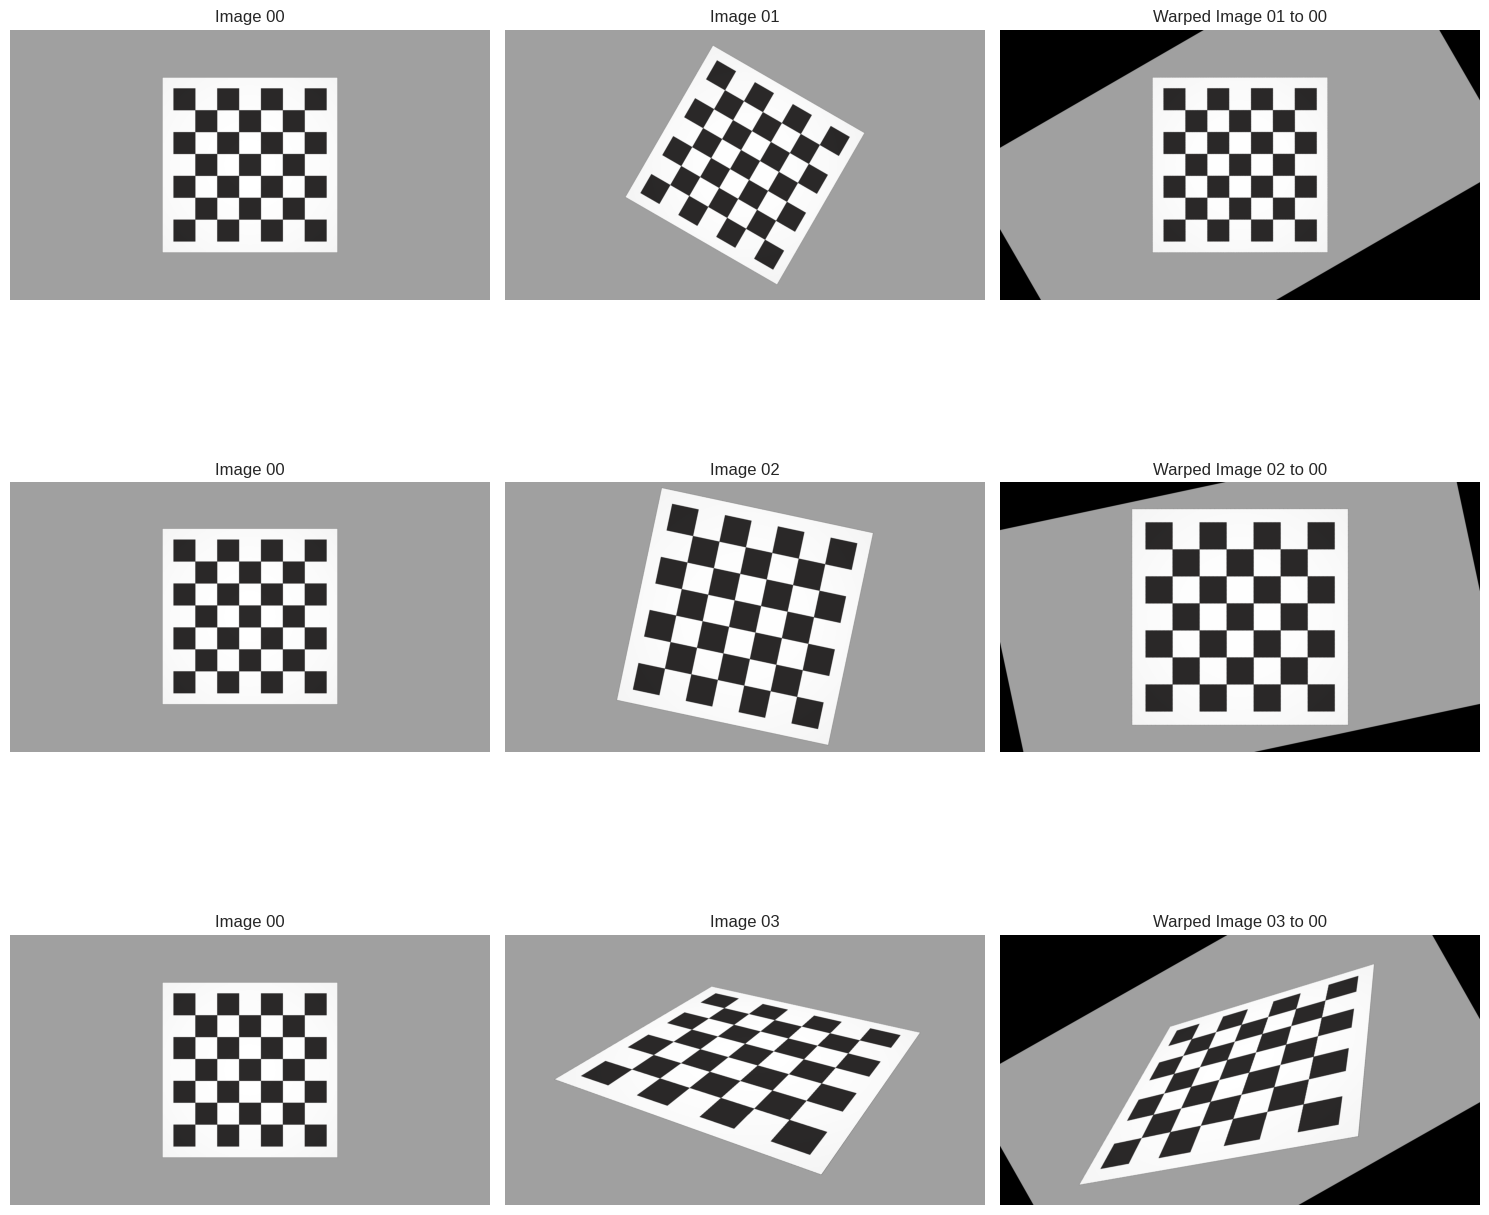

In [23]:
# Make a list of keypoints
keypoints_data = [keypoints_00, keypoints_01, keypoints_02, keypoints_03]

# Compute Euclidean homography between images
H_matrices = [computeHomography(keypoints_data[0], keypoints_data[i], 'Euclidean') for i in range(1, len(keypoints_data))]

# Apply homography using cv2.warpPerspective with adjusted output size
output_size = (img00c.shape[1], img00c.shape[0])

results = []
for i, img in enumerate([img01c, img02c, img03c]):
    result = apply_homography(img, np.linalg.inv(H_matrices[i]), output_size)
    results.append(result)

# Display the results
plt.figure(figsize=(15, 15))

for i in range(3):
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(cv2.cvtColor(img00c, cv2.COLOR_BGR2RGB))
    plt.title("Image 00")
    plt.axis("off")

    plt.subplot(3, 3, i * 3 + 2)
    plt.imshow(cv2.cvtColor([img01c, img02c, img03c][i], cv2.COLOR_BGR2RGB))
    plt.title(f"Image 0{i+1}")
    plt.axis("off")

    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(cv2.cvtColor(results[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Warped Image 0{i+1} to 00")
    plt.axis("off")

plt.tight_layout()
plt.show()

##Compute Similarity Homography
Compute the Similarity Homography between all loaded images

After computing them use the function `cv2.warpPerspective` to check the obtainen result

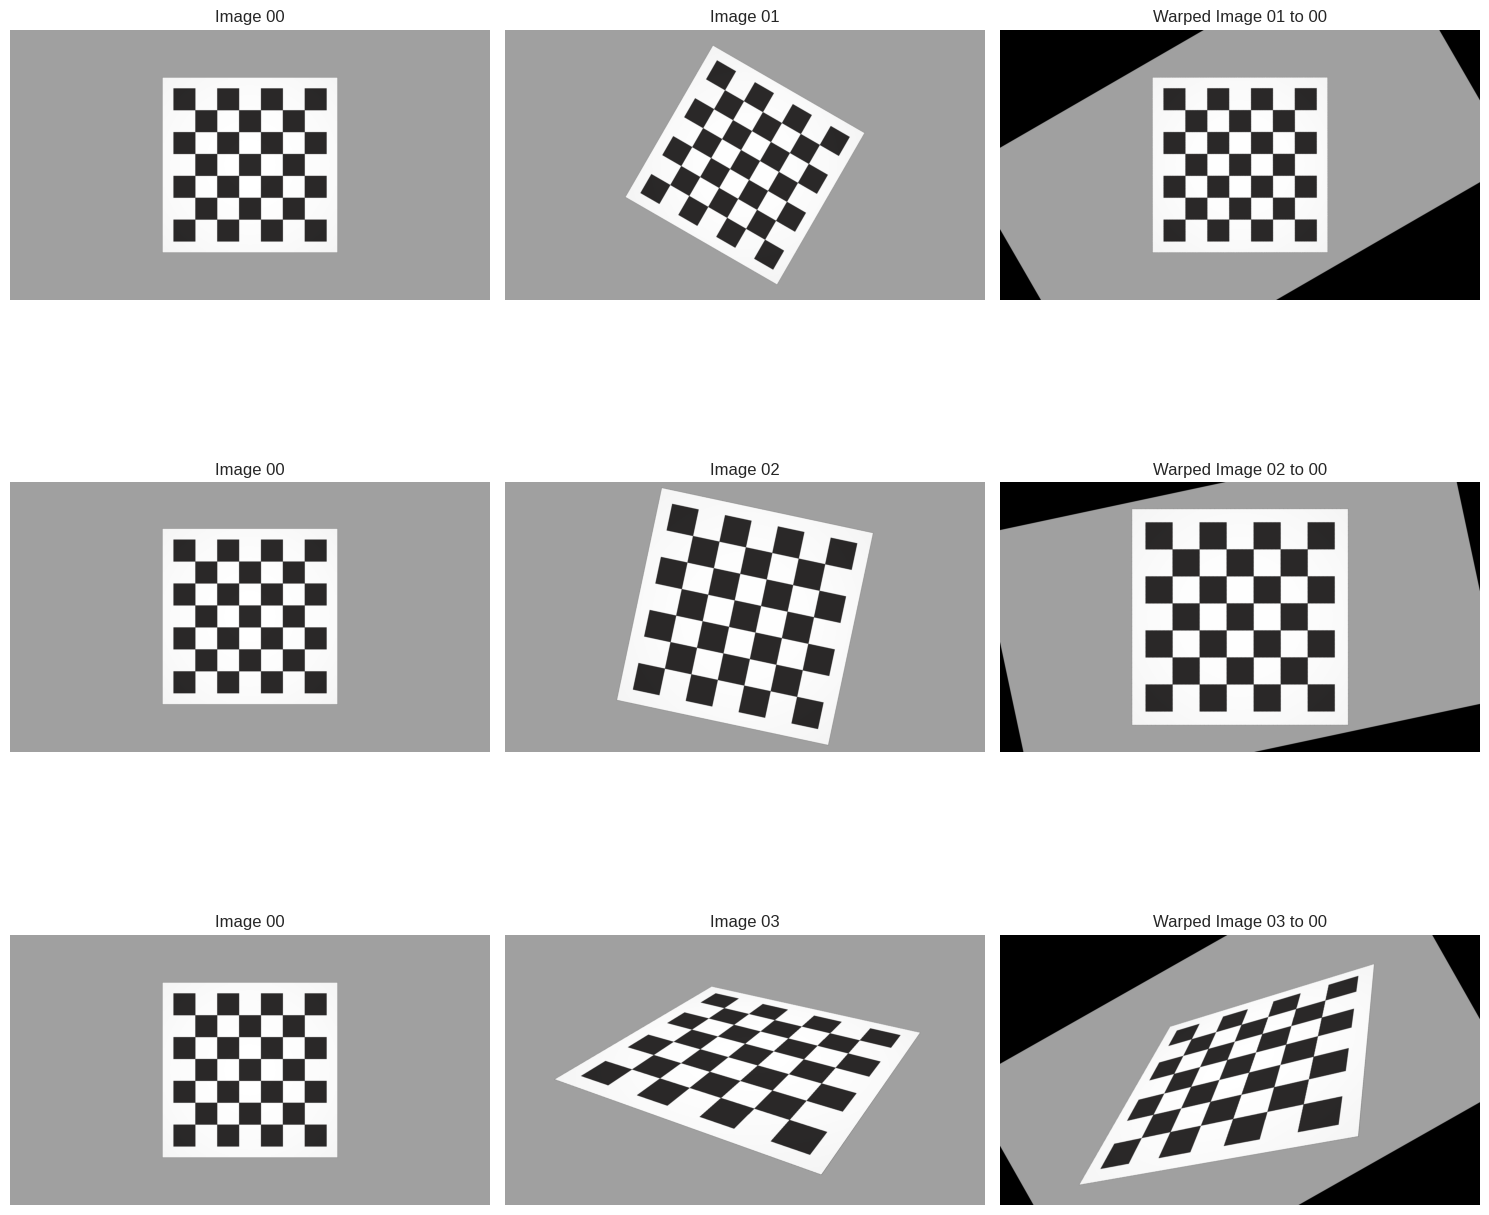

In [24]:
# Compute Similarity homography between images
H_matrices = [computeHomography(keypoints_data[0], keypoints_data[i], 'Similarity') for i in range(1, len(keypoints_data))]

# Apply homography using cv2.warpPerspective with adjusted output size
output_size = (img00c.shape[1], img00c.shape[0])  # Use the size of the original images

results = []
for i, img in enumerate([img01c, img02c, img03c]):
    result = apply_homography(img, np.linalg.inv(H_matrices[i]), output_size)
    results.append(result)

# Display the results
plt.figure(figsize=(15, 15))

for i in range(3):
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(cv2.cvtColor(img00c, cv2.COLOR_BGR2RGB))
    plt.title("Image 00")
    plt.axis("off")

    plt.subplot(3, 3, i * 3 + 2)
    plt.imshow(cv2.cvtColor([img01c, img02c, img03c][i], cv2.COLOR_BGR2RGB))
    plt.title(f"Image 0{i+1}")
    plt.axis("off")

    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(cv2.cvtColor(results[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Warped Image 0{i+1} to 00")
    plt.axis("off")

plt.tight_layout()
plt.show()

##Compute Affine Homography

Compute the Affine Homography between all loaded images

After computing them use the function `cv2.warpPerspective` to check the obtainen result

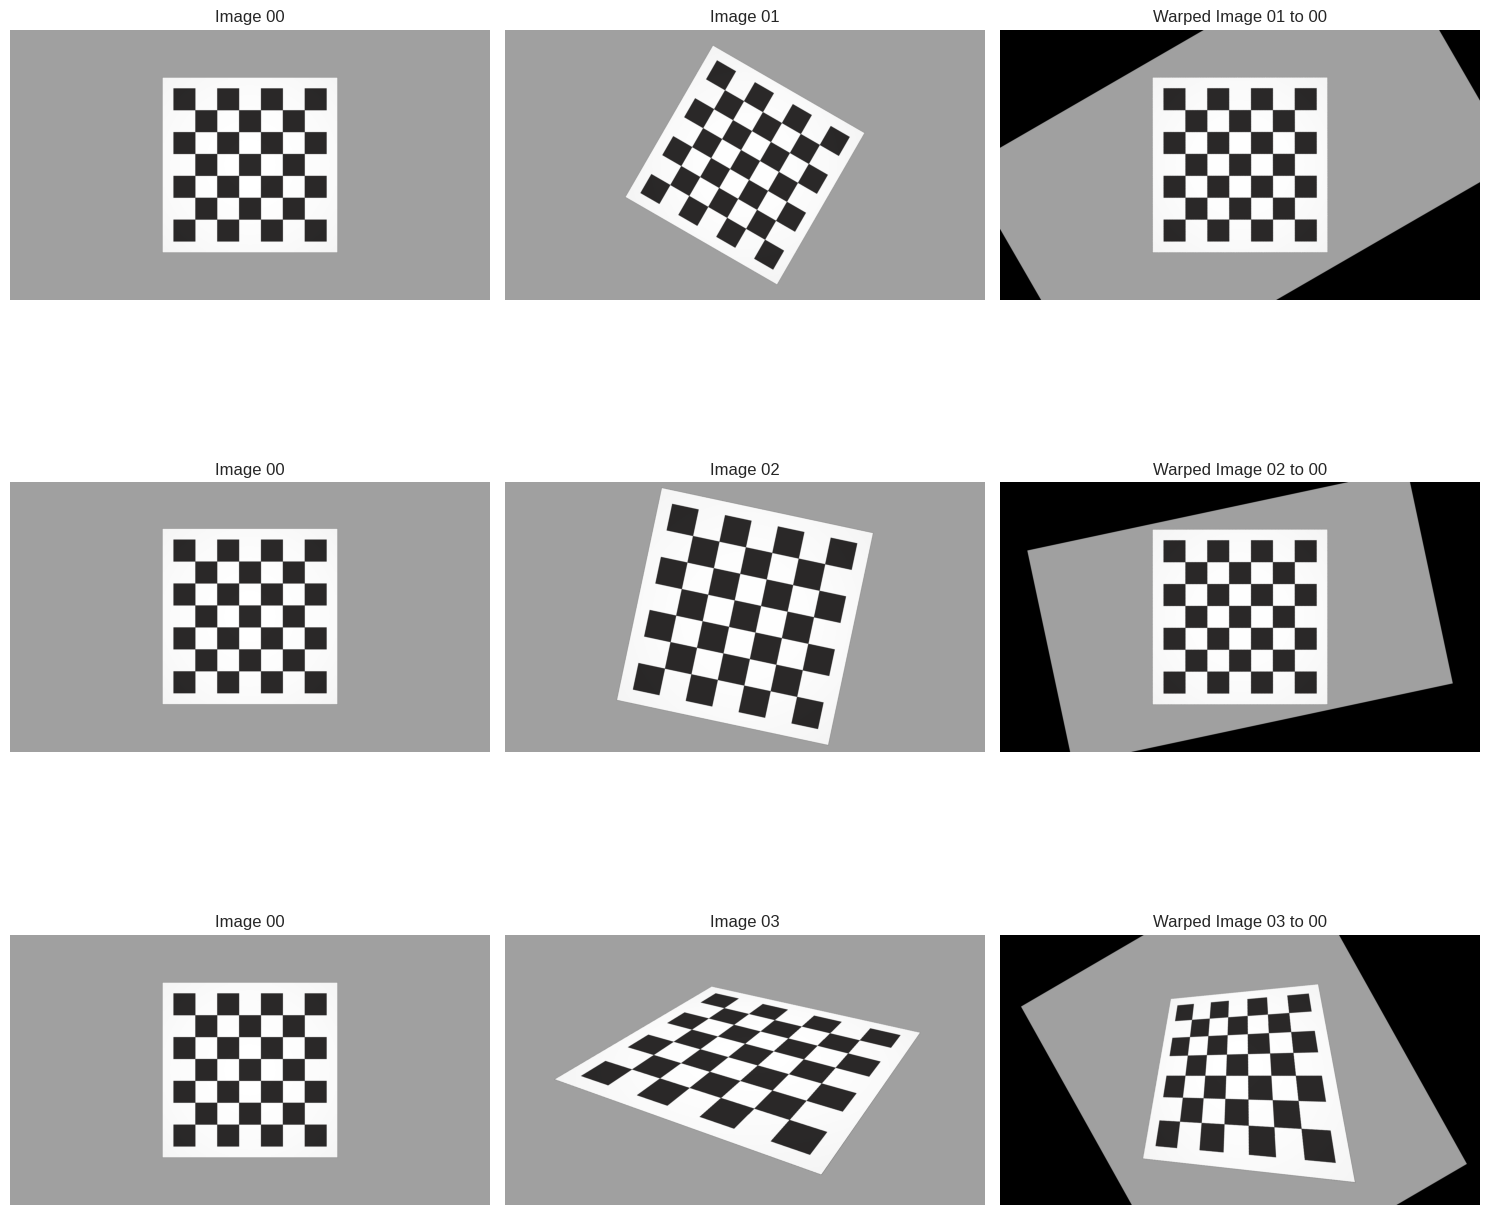

In [25]:
# Compute Affine homography between images
H_matrices = [computeHomography(keypoints_data[0], keypoints_data[i], 'Affine') for i in range(1, len(keypoints_data))]

# Apply homography using cv2.warpPerspective with adjusted output size
output_size = (img00c.shape[1], img00c.shape[0])  # Use the size of the original images

results = []
for i, img in enumerate([img01c, img02c, img03c]):
    result = apply_homography(img, np.linalg.inv(H_matrices[i]), output_size)
    results.append(result)

# Display the results in a 3x3 grid
plt.figure(figsize=(15, 15))

for i in range(3):
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(cv2.cvtColor(img00c, cv2.COLOR_BGR2RGB))
    plt.title("Image 00")
    plt.axis("off")

    plt.subplot(3, 3, i * 3 + 2)
    plt.imshow(cv2.cvtColor([img01c, img02c, img03c][i], cv2.COLOR_BGR2RGB))
    plt.title(f"Image 0{i+1}")
    plt.axis("off")

    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(cv2.cvtColor(results[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Warped Image 0{i+1} to 00")
    plt.axis("off")

plt.tight_layout()
plt.show()

##Compute Projective Homography

Compute the Euclidean Homography between all loaded images

After computing them use the function `cv2.warpPerspective` to check the obtainen result

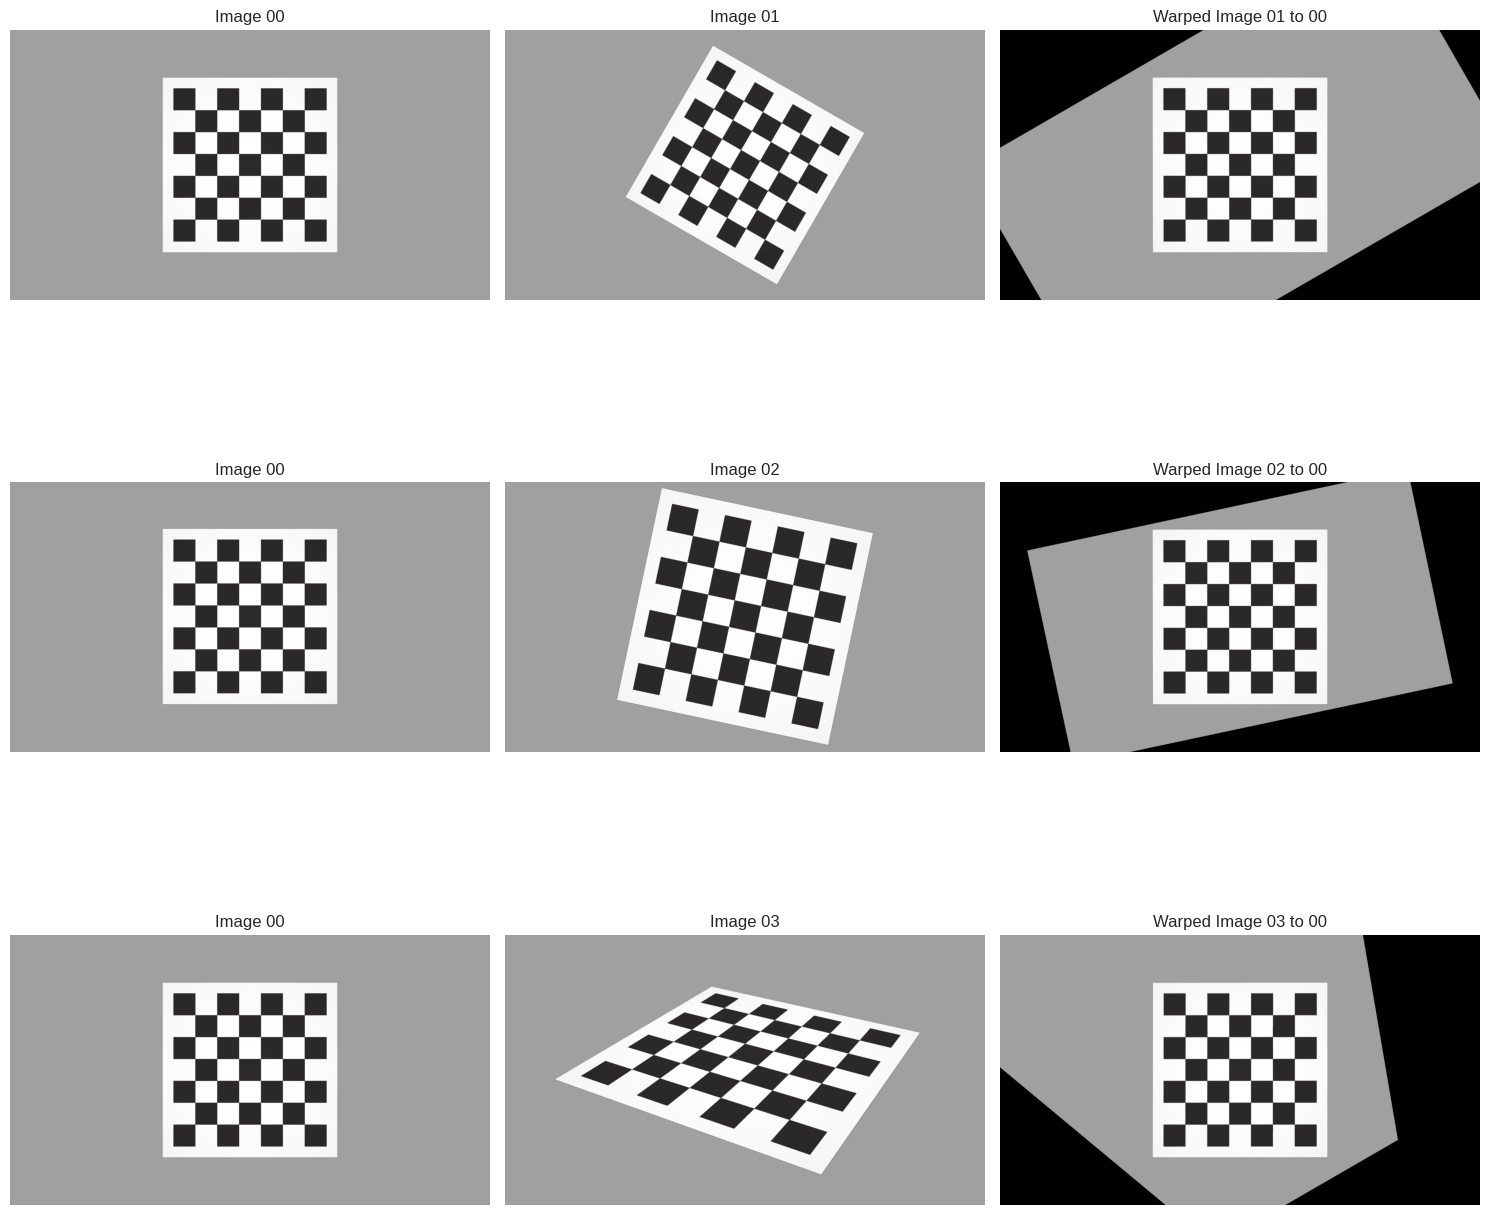

In [26]:
# Compute Affine homography between images
H_matrices = [computeHomography(keypoints_data[0], keypoints_data[i], 'Projective') for i in range(1, len(keypoints_data))]

# Apply homography using cv2.warpPerspective with adjusted output size
output_size = (img00c.shape[1], img00c.shape[0])

results = []
for i, img in enumerate([img01c, img02c, img03c]):
    result = apply_homography(img, np.linalg.inv(H_matrices[i]), output_size)
    results.append(result)

# Display the results
plt.figure(figsize=(15, 15))

for i in range(3):
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(cv2.cvtColor(img00c, cv2.COLOR_BGR2RGB))
    plt.title("Image 00")
    plt.axis("off")

    plt.subplot(3, 3, i * 3 + 2)
    plt.imshow(cv2.cvtColor([img01c, img02c, img03c][i], cv2.COLOR_BGR2RGB))
    plt.title(f"Image 0{i+1}")
    plt.axis("off")

    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(cv2.cvtColor(results[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Warped Image 0{i+1} to 00")
    plt.axis("off")

plt.tight_layout()
plt.show()

##Comment the previous obtained results.

Which is the best homography for each image pair? Why?

$\color{red}{\text{ANSWER}}$
$\color{red}{\text{The Projective Homography provided the best result for each image pair because it accurately mapped the perspective transformation between the images, preserving straight lines and enabling proper alignment and transformation of corresponding points in the images. }}$

## Compute Homography with skin images

Now Compute the Homography between the 2 skin images used during the first sesion using your Homography Computation function. Use all models and and compare the results

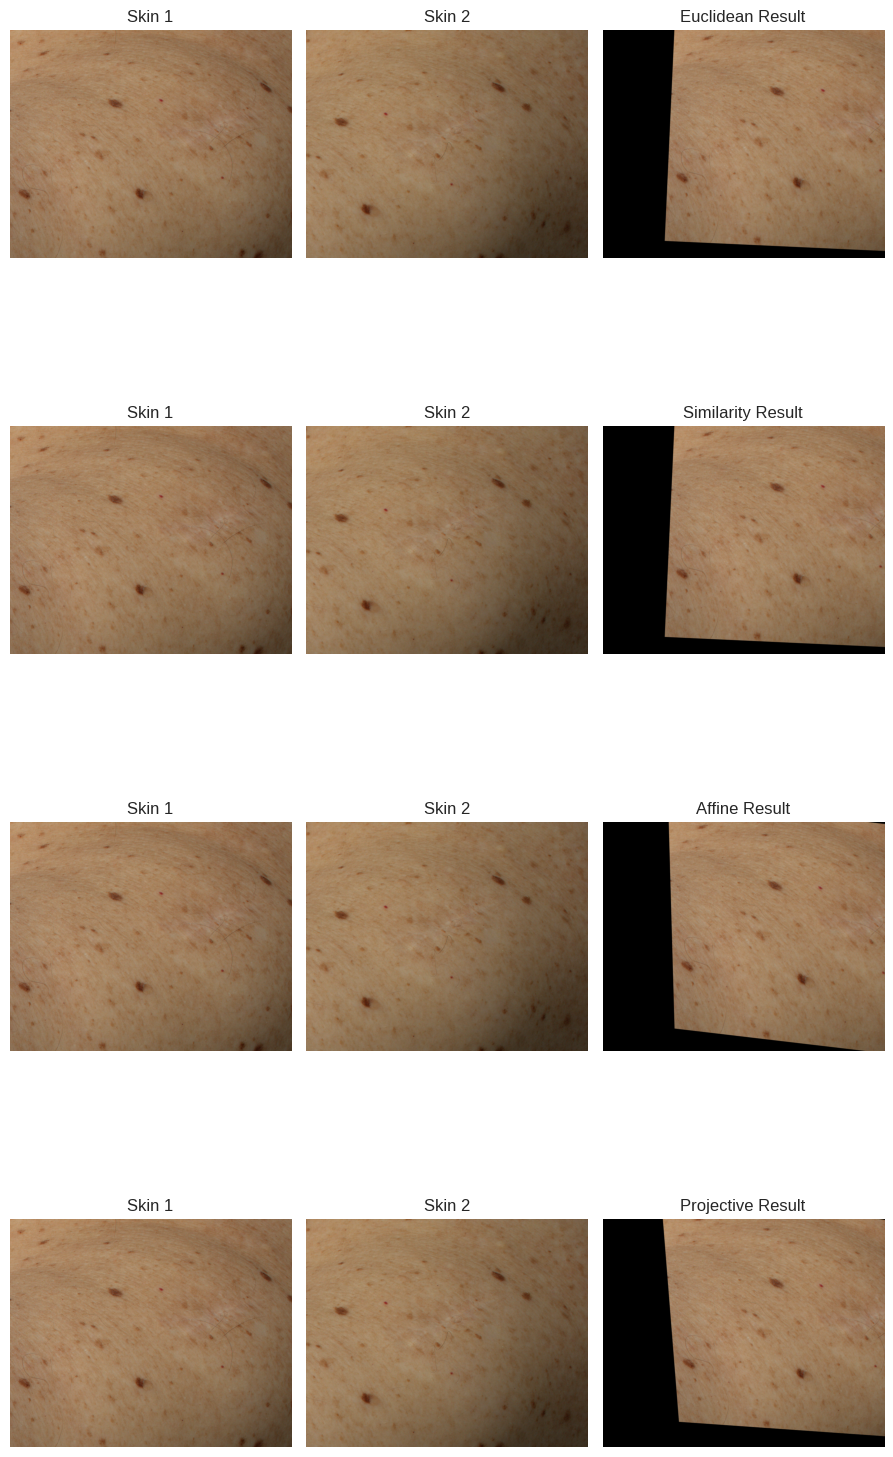

In [37]:
# Load the images
skin_1 = cv2.imread("skin1.png")
skin_2 = cv2.imread("skin2.png")

# Crop black borders from the images
cropped_skin_1 = crop_black_border(skin_1)
cropped_skin_2 = crop_black_border(skin_2)

# Convert images into grayscale
gray_1 = cv2.cvtColor(cropped_skin_1, cv2.COLOR_BGR2GRAY)
gray_2 = cv2.cvtColor(cropped_skin_2, cv2.COLOR_BGR2GRAY)

# Get the lowe matches
lowe_match = SIFT_match(des1, des2, kp1, kp2, gray_1, gray_2)

# Extract matched keypoints
matched_kp1 = np.array([kp1[match.queryIdx].pt for match in lowe_match])
matched_kp2 = np.array([kp2[match.trainIdx].pt for match in lowe_match])

# Get the size of the original skin images
image_size = (cropped_skin_1.shape[1], cropped_skin_1.shape[0])

# Compute Euclidean homography between skin images
H_skin_euclidean      = computeHomography(matched_kp1, matched_kp2, 'Euclidean')
result_skin_euclidean = apply_homography(cropped_skin_1, np.linalg.inv(H_skin_euclidean), image_size)

# Compute Similarity homography between skin images
H_skin_similarity      = computeHomography(matched_kp1, matched_kp2, 'Similarity')
result_skin_similarity = apply_homography(cropped_skin_1, np.linalg.inv(H_skin_similarity), image_size)

# Compute Affine homography between skin images
H_skin_affine      = computeHomography(matched_kp1, matched_kp2, 'Affine')
result_skin_affine = apply_homography(cropped_skin_1, np.linalg.inv(H_skin_affine), image_size)

# Compute Projective homography between skin images
H_skin_projective      = computeHomography(matched_kp1, matched_kp2, 'Projective')
result_skin_projective = apply_homography(cropped_skin_1, np.linalg.inv(H_skin_projective), image_size)

# Define the subplot layout manually for the four rows
fig = plt.figure(figsize=(12, 16))

# Row 1
ax1 = fig.add_subplot(4, 4, 1)
ax1.imshow(cv2.cvtColor(cropped_skin_1, cv2.COLOR_BGR2RGB))
ax1.set_title('Skin 1')
ax1.axis('off')

ax2 = fig.add_subplot(4, 4, 2)
ax2.imshow(cv2.cvtColor(cropped_skin_2, cv2.COLOR_BGR2RGB))
ax2.set_title('Skin 2')
ax2.axis('off')

ax3 = fig.add_subplot(4, 4, 3)
ax3.imshow(cv2.cvtColor(result_skin_euclidean, cv2.COLOR_BGR2RGB))
ax3.set_title('Euclidean Result')
ax3.axis('off')

# Row 2
ax4 = fig.add_subplot(4, 4, 5)
ax4.imshow(cv2.cvtColor(cropped_skin_1, cv2.COLOR_BGR2RGB))
ax4.set_title('Skin 1')
ax4.axis('off')

ax5 = fig.add_subplot(4, 4, 6)
ax5.imshow(cv2.cvtColor(cropped_skin_2, cv2.COLOR_BGR2RGB))
ax5.set_title('Skin 2')
ax5.axis('off')

ax6 = fig.add_subplot(4, 4, 7)
ax6.imshow(cv2.cvtColor(result_skin_similarity, cv2.COLOR_BGR2RGB))
ax6.set_title('Similarity Result')
ax6.axis('off')

# Row 3
ax7 = fig.add_subplot(4, 4, 9)
ax7.imshow(cv2.cvtColor(cropped_skin_1, cv2.COLOR_BGR2RGB))
ax7.set_title('Skin 1')
ax7.axis('off')

ax8 = fig.add_subplot(4, 4, 10)
ax8.imshow(cv2.cvtColor(cropped_skin_2, cv2.COLOR_BGR2RGB))
ax8.set_title('Skin 2')
ax8.axis('off')

ax9 = fig.add_subplot(4, 4, 11)
ax9.imshow(cv2.cvtColor(result_skin_affine, cv2.COLOR_BGR2RGB))
ax9.set_title('Affine Result')
ax9.axis('off')

# Row 4
ax10 = fig.add_subplot(4, 4, 13)
ax10.imshow(cv2.cvtColor(cropped_skin_1, cv2.COLOR_BGR2RGB))
ax10.set_title('Skin 1')
ax10.axis('off')

ax11 = fig.add_subplot(4, 4, 14)
ax11.imshow(cv2.cvtColor(cropped_skin_2, cv2.COLOR_BGR2RGB))
ax11.set_title('Skin 2')
ax11.axis('off')

ax12 = fig.add_subplot(4, 4, 15)
ax12.imshow(cv2.cvtColor(result_skin_projective, cv2.COLOR_BGR2RGB))
ax12.set_title('Projective Result')
ax12.axis('off')

plt.tight_layout()
plt.show()



## You should notice that you have outliers when you compute the Homography.

Implement RANSAC function and recompute all the Homographies using it.

Finally Warp one of the images and compare your results with the ones obtained using opencv functions.

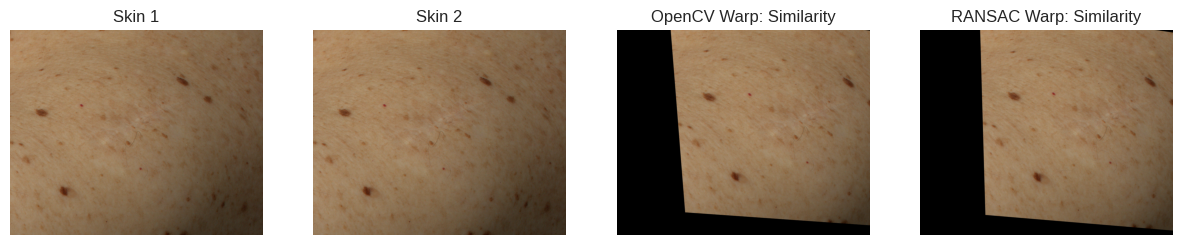

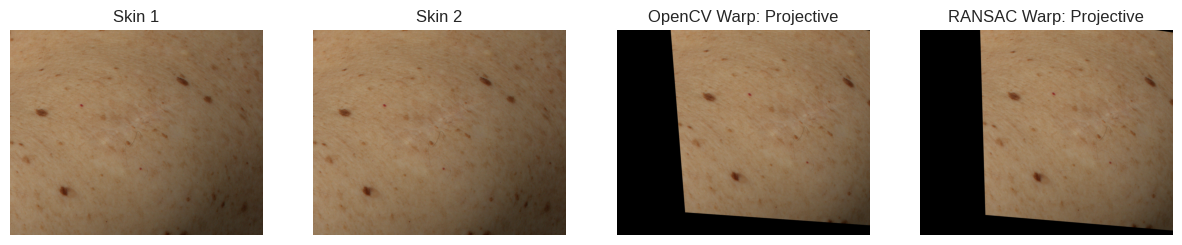

In [43]:
# Define a RANSAC-based function for computing homography
def ransac_homography(kp1, kp2, matches, threshold=10, max_iterations=1000):
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 2)

    model, inliers = ransac((src_pts, dst_pts), ProjectiveTransform, min_samples=4,
                            residual_threshold=threshold, max_trials=max_iterations)
    return model.params, inliers

# Apply RANSAC to filter out outliers
threshold_ransac = 10
max_iterations_ransac = 1000

# Apply RANSAC to Euclidean homography
H_ransac_euclidean, inliers_euclidean = ransac_homography(kp1, kp2, lowe_match, threshold=threshold_ransac, max_iterations=max_iterations_ransac)

# Apply RANSAC to Similarity homography
H_ransac_similarity, inliers_similarity = ransac_homography(kp1, kp2, lowe_match, threshold=threshold_ransac, max_iterations=max_iterations_ransac)

# Apply RANSAC to Affine homography
H_ransac_affine, inliers_affine = ransac_homography(kp1, kp2, lowe_match, threshold=threshold_ransac, max_iterations=max_iterations_ransac)

# Apply RANSAC to Projective homography
H_ransac_projective, inliers_projective = ransac_homography(kp1, kp2, lowe_match, threshold=threshold_ransac, max_iterations=max_iterations_ransac)

# Apply homography using OpenCV's warpPerspective
result_cv2 = apply_homography(cropped_skin_2, np.linalg.inv(H_skin_projective), image_size)

# Apply homography using RANSAC-refined homography
result_ransac_similarity = apply_homography(cropped_skin_2, np.linalg.inv(H_ransac_similarity), image_size)

# Apply homography using RANSAC-refined homography
result_ransac_projective = apply_homography(cropped_skin_2, np.linalg.inv(H_ransac_projective), image_size)


# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1); plt.imshow(cv2.cvtColor(cropped_skin_2, cv2.COLOR_BGR2RGB)); plt.title("Skin 1"); plt.axis("off")
plt.subplot(1, 4, 2); plt.imshow(cv2.cvtColor(cropped_skin_2, cv2.COLOR_BGR2RGB)); plt.title("Skin 2"); plt.axis("off")
plt.subplot(1, 4, 3); plt.imshow(cv2.cvtColor(result_cv2, cv2.COLOR_BGR2RGB)); plt.title("OpenCV Warp: Similarity"); plt.axis("off")
plt.subplot(1, 4, 4); plt.imshow(cv2.cvtColor(result_ransac_similarity, cv2.COLOR_BGR2RGB)); plt.title("RANSAC Warp: Similarity"); plt.axis("off")
plt.show()

# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1); plt.imshow(cv2.cvtColor(cropped_skin_2, cv2.COLOR_BGR2RGB)); plt.title("Skin 1"); plt.axis("off")
plt.subplot(1, 4, 2); plt.imshow(cv2.cvtColor(cropped_skin_2, cv2.COLOR_BGR2RGB)); plt.title("Skin 2"); plt.axis("off")
plt.subplot(1, 4, 3); plt.imshow(cv2.cvtColor(result_cv2, cv2.COLOR_BGR2RGB)); plt.title("OpenCV Warp: Projective"); plt.axis("off")
plt.subplot(1, 4, 4); plt.imshow(cv2.cvtColor(result_ransac_projective, cv2.COLOR_BGR2RGB)); plt.title("RANSAC Warp: Projective"); plt.axis("off")
plt.show()



## Extra Work

There are many ways to apply *Deep Learning* for registering images. Do some research and find a solution that uses it and apply it to skin1 and skin2 images.

In [44]:
# Import libraries
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from keras.layers import Input, Dense
from keras.models import Model

In [45]:
# Files upload
from google.colab import files
uploaded = files.upload()

Saving skin1.png to skin1 (1).png
Saving skin2.png to skin2 (1).png


In [46]:
# Read and preprocess skin images
image_1 = cv2.imread("skin1.png")
image_2 = cv2.imread("skin2.png")

In [47]:
# Function for preprocessing images
def preprocess_image(image, target_size=(128, 128)):
    # Resize the image to the target size
    resized_image = cv2.resize(image, target_size)

    # Normalize the image pixel values between 0 and 1
    normalized_image = resized_image.astype('float32') / 255.0

    return normalized_image

In [48]:
image_1 = preprocess_image(image_1)
image_2 = preprocess_image(image_2)

In [49]:
# Synthetic transformation parameters
num_samples = 100
theta = 10
tx, ty = 20, 10

In [50]:
# Apply synthetic transformation to create pairs of images and transformation parameters
rows, cols, _ = image_2.shape
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), theta, 1)
M[:, 2] += [tx, ty]

In [51]:
# Generate multiple pairs of images and transformation parameters
X_train = []
y_train = []

In [52]:
for _ in range(num_samples):
    registered_image_2 = cv2.warpAffine(image_2, M, (cols, rows), borderMode=cv2.BORDER_CONSTANT, borderValue=1.0)

    image_1_flat = image_1.flatten()
    image_2_flat = registered_image_2.flatten()

    X_train.append(np.hstack([image_1_flat, image_2_flat]))
    y_train.append([tx, ty, np.radians(theta), 1.0, 0.0, 0.0])

In [54]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [55]:
# Define input shape (based on the concatenated flattened images)
input_shape = (X_train.shape[1],)

In [56]:
# Create a simple regression model
input_layer = Input(shape=input_shape)
dense_1 = Dense(128, activation='relu')(input_layer)
dense_2 = Dense(64, activation='relu')(dense_1)
output_layer = Dense(6, activation='linear')(dense_2)  # Output 6 parameters

In [57]:
# Compile the model
regression_model = Model(inputs=input_layer, outputs=output_layer)
regression_model.compile(optimizer='adam', loss='mean_squared_error')

In [63]:
# Training history plot
history = regression_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 1s 209ms/step - loss: 149.0036 - val_loss: 129.6833
Epoch 2/20
5/5 [==============================] - 1s 194ms/step - loss: 77.9713 - val_loss: 24.3283
Epoch 3/20
5/5 [==============================] - 1s 192ms/step - loss: 27.4827 - val_loss: 17.0102
Epoch 4/20
5/5 [==============================] - 1s 194ms/step - loss: 14.9744 - val_loss: 8.2802
Epoch 5/20
5/5 [==============================] - 1s 260ms/step - loss: 11.0658 - val_loss: 7.7064
Epoch 6/20
5/5 [==============================] - 1s 300ms/step - loss: 8.2785 - val_loss: 7.9510
Epoch 7/20
5/5 [==============================] - 1s 293ms/step - loss: 7.7073 - val_loss: 8.2299
Epoch 8/20
5/5 [==============================] - 1s 210ms/step - loss: 5.5350 - val_loss: 4.4409
Epoch 9/20
5/5 [==============================] - 1s 202ms/step - loss: 3.9255 - val_loss: 5.5701
Epoch 10/20
5/5 [==============================] - 1s 199ms/step - loss: 3.2011 - val_loss: 2.4861
Epoch 11/

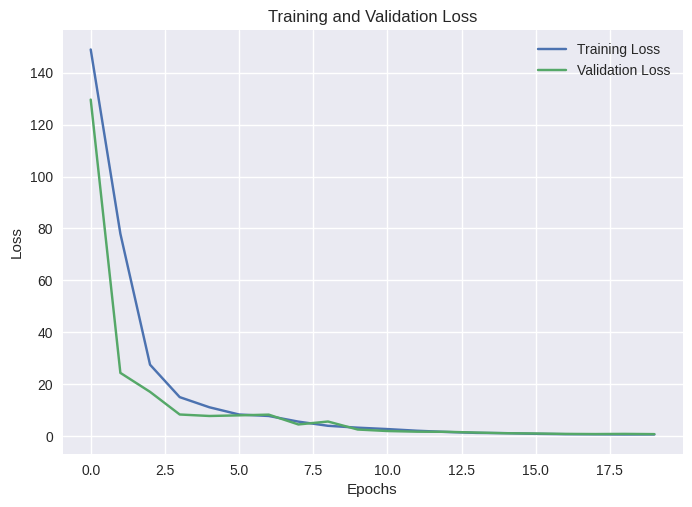

In [64]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

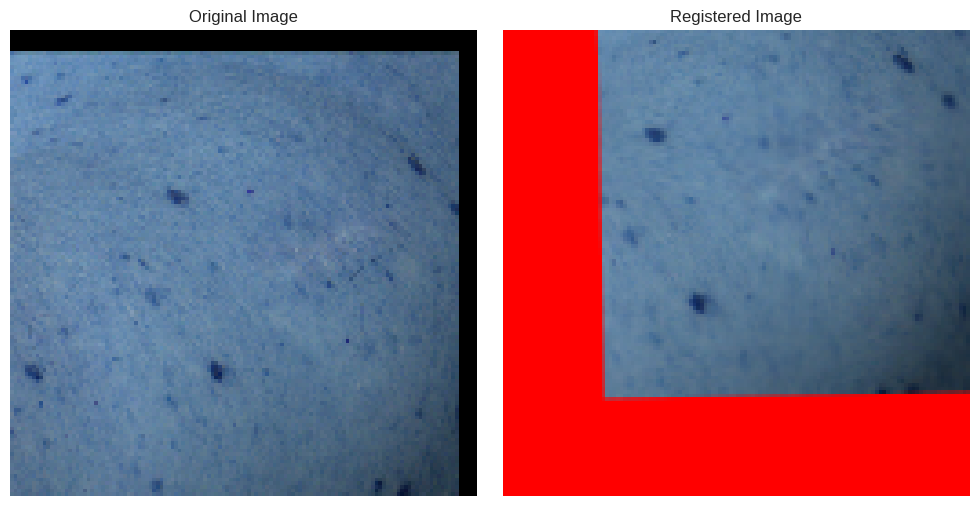

In [67]:
# Get a pair of original and registered images for visualization
idx = 4   # Index of the image pair to visualize

# Get the registered image after transformation
registered_image_2 = cv2.warpAffine(image_2, M, (cols, rows), borderMode=cv2.BORDER_CONSTANT, borderValue=1.0)

# Display the original image (image_1) and the registered image (registered_image_2)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(np.squeeze(image_1))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(np.squeeze(registered_image_2))
axs[1].set_title('Registered Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()

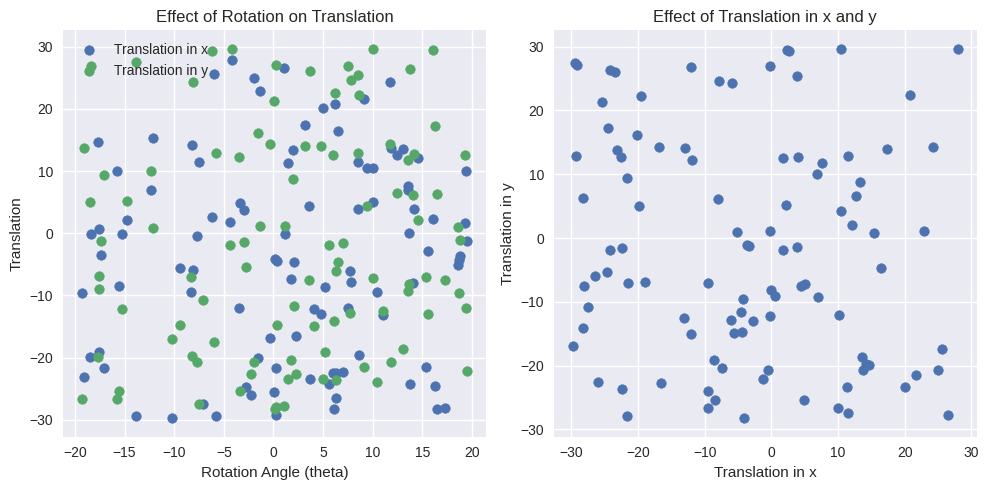

In [66]:
# Generate synthetic transformation parameters for visualization
theta_values = np.random.uniform(-20, 20, num_samples)  # Generating random theta values for visualization
tx_values = np.random.uniform(-30, 30, num_samples)     # Generating random tx values for visualization
ty_values = np.random.uniform(-30, 30, num_samples)     # Generating random ty values for visualization

# Apply synthetic transformation to create pairs of images and transformation parameters
X_train = []
y_train = []

for i in range(num_samples):
    theta = theta_values[i]
    tx = tx_values[i]
    ty = ty_values[i]

    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), theta, 1)
    M[:, 2] += [tx, ty]

    registered_image_2 = cv2.warpAffine(image_2, M, (cols, rows), borderMode=cv2.BORDER_CONSTANT, borderValue=1.0)

    image_1_flat = image_1.flatten()
    image_2_flat = registered_image_2.flatten()

    X_train.append(np.hstack([image_1_flat, image_2_flat]))
    y_train.append([tx, ty, np.radians(theta), 1.0, 0.0, 0.0])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Plotting the applied transformation parameters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(theta_values, tx_values, label='Translation in x')
plt.scatter(theta_values, ty_values, label='Translation in y')
plt.xlabel('Rotation Angle (theta)')
plt.ylabel('Translation')
plt.title('Effect of Rotation on Translation')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(tx_values, ty_values)
plt.xlabel('Translation in x')
plt.ylabel('Translation in y')
plt.title('Effect of Translation in x and y')
plt.tight_layout()
plt.show()


We generates random transformation parameters (rotation angle, translation in x and y) within specified ranges (-20 to 20 for rotation and -30 to 30 for translation) and then visualizes the relationships between these parameters. The scatter plots demonstrate how changes in rotation affect translation and how translation in x and y are related.


## Congratulations!
In this lab you:
- tested SIFT Algorithm
- implemented homography computation

Submit this notebook by the lab deadline, with the cells executed and including your **answers** in the text fields in $\color{red}{\text{red}}$ color.